### Default Imports

In [5]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

### Loading data with npy file

In [6]:
volt = np.load('./exampledata.npy') # voltage series

### Generate time axis

In [7]:
rate = 1000. # sampling rate, read more below
time = np.arange(0,len(volt)/rate, 1/rate) #time series

### Sampling & Aliasing

If you look at line 11, you can see that we have a variable name "rate" which reflects the sampling rate we want to plot on our time series. What does this mean you might ask? Jack Schaedler at https://jackschaedler.github.io/circles-sines-signals/aliasing.html does an excellent job of explaining this under "Sampling & Aliasing", so read up and return!

To summarize, although you should really look at the link above, sampling is basically taking measurements of a time series at constant intervals, for example in figure 1., we have a 2 hour flight from Paris to Berlin with a sample rate of 10 minutes. We should take care not to "connect the dots" as we can see that figure 1 has the same sample rates for 3 different flights but they are totally different in altitudes overall.

So why Sample?
We sample because there is a cost to data which is memory. Sometimes you will have extremely large data sets that simply take too much memory so we take sample rates to divide that space usage. It is possible to oversample which means that we have more samples than necessary but there is also undersampling which is when we lose information by not sampling enough.

-----------------------------------------------------------------------------------------------------------------------------
If you would like further information on how to choose a good sampling rate, take a look at Schaedler's interactive site https://jackschaedler.github.io/circles-sines-signals/sampling.html under "The Sampling Theorem"



![image1.png](img/image1.png)
from https://jackschaedler.github.io/circles-sines-signals/aliasing.html

### 1. Plot the time series

(9, 10.5)

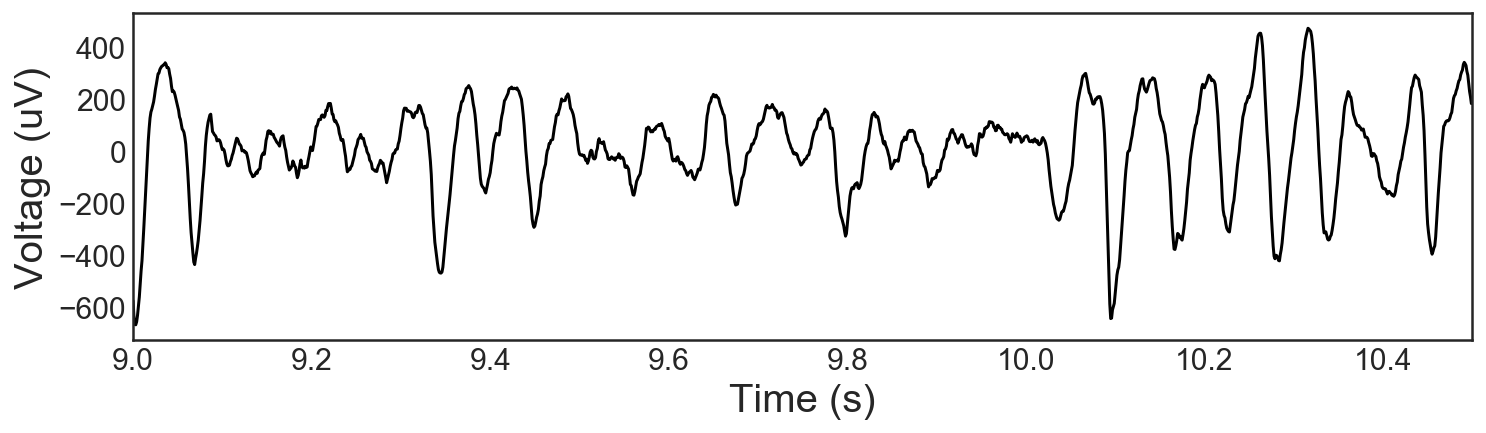

In [8]:
time_plot = [9, 10.5] # time range you want to plot
time_plot_idx = np.where(np.logical_and(time>=time_plot[0], time < time_plot[1]))[0]
plt.figure(figsize=(12,3))
plt.plot(time[time_plot_idx], volt[time_plot_idx],'k')
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)
plt.xlim((time_plot))

### Ground vs. Referencing

To learn more about ground vs. reference for EEG recordings, we will visit 
1. https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/
2. (https://www.researchgate.net/post/What_is_the_difference_between_ground_and_reference_electrode_in_EEG_recording)

To summarize, although you should really look at the links above,

An EEG (electroencephalogram)is the potential difference between an active electrode and a reference electrode.

The ground electrode is used to reduce artifacts (electrical circuit, mouvement...), preventing noise from interfering with the signals of interest.

Referencing is when you have an electrode you use to measure the electrical difference between the active electrode and itself.


![image2.png](img/image2.png)

From https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/

"The reference lead is the lead that connects the reference electrode; in EEG recordings, this electrode is usually placed at the ear or, in the case of “summed ears,” to a pair of electrodes, one at each ear. The measured electrical potential differences are ideally the voltage drops from the active electrode (connected to Vin+ on the amplifier) to the reference electrode (connected to Vin- on the amplifier).

In a unipolar setup, there will be one reference electrode, and the potential difference between this electrode (connected to Vin-) and every other electrode on the head (connected to Vin+ on separate amplifiers) will be measured.

For bipolar recordings, each active (Vin+) electrode will have its own reference (Vin-) connection."
(https://www.biopac.com/knowledge-base/ground-vs-reference-for-eeg-recording/)

### Neural Oscillations